In [1]:
# pip install nbformat

In [1]:
# Nifty Hourly Data Analysis

# This notebook analyzes the relationship between the closing price of the first hour on the first day of the week (Monday) and the price range for the 3rd week expiry.

## Objectives
# - Analyze price trends from Monday's first hour
# - Identify patterns between Monday's first hour close and subsequent expiry price ranges
# - Overlay Nifty and VIX charts with projected ranges
# - Identify consistent patterns/edges for potential trading strategies
# - Rationalize findings into actionable insights

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set plotting style
plt.style.use('fivethirtyeight')
sns.set_theme(style="whitegrid")

In [2]:
## Data Loading and Preprocessing

# Load datasets
analysis_df = pd.read_csv('../data/nifty_analysis_results.csv')
vix_df = pd.read_csv('../data/india_vix.csv')
nifty_df = pd.read_csv('../data/nifty_data.csv')

# Display the first few rows of each dataset
print("Nifty Analysis Results:")
display(analysis_df.head())

print("\nIndia VIX Data:")
display(vix_df.head())

print("\nNifty Hourly Data:")
display(nifty_df.head())

Nifty Analysis Results:


,monday_date,monday_day,monday_open,monday_low,monday_high,monday_close,monday_volume,expiry_date,expiry_day,expiry_open,expiry_low,expiry_high,expiry_close,expiry_volume,3_week_high,3_week_low,monday_close_minus_expiry_close,3_week_high_minus_monday_close,3_week_low_minus_monday_close,3_week_high_minus_thursday_close,3_week_low_minus_thursday_close
0,2021-03-01,Monday,14709.95,14658.50,14791.00,14753.65,3666450,2021-03-18,Thursday,14868.25,14837.9,14900.25,14845.0,2840775,15375.00,14658.5,-91.35,621.35,-95.15,530.00,-186.5
1,2021-03-08,Monday,15001.20,14980.10,15140.00,15115.35,3194775,2021-03-25,Thursday,14560.00,14410.5,14560.00,14432.0,2319750,15375.00,14371.3,683.35,259.65,-744.05,943.00,-60.7
2,2021-03-15,Monday,15050.00,14836.55,15068.95,14884.05,3748350,2021-04-01,Thursday,14823.10,14811.0,14879.00,14836.0,2465100,15068.95,14371.3,48.05,184.90,-512.75,232.95,-464.7
3,2021-03-22,Monday,14741.05,14665.10,14779.90,14743.15,2768775,2021-04-08,Thursday,14939.80,14925.5,15020.00,15002.0,2163000,15020.00,14410.5,-258.85,276.85,-332.65,18.00,-591.5
4,2021-04-05,Monday,14890.00,14594.40,14899.85,14612.00,5129625,2021-04-22,Thursday,14200.00,14155.0,14277.70,14249.3,2968200,15020.00,14155.0,362.70,408.00,-457.00,770.70,-94.3



India VIX Data:


,datetime,open,high,low,close
0,2020-07-06 12:15:00,25.4100,25.4225,25.1550,25.2775
1,2020-07-06 13:15:00,25.2800,25.5175,25.2075,25.4525
2,2020-07-06 14:15:00,25.4550,25.4950,25.1450,25.1550
3,2020-07-06 15:15:00,25.1525,25.2325,25.0725,25.0825
4,2020-07-07 09:15:00,25.1975,25.6450,24.2400,25.1300



Nifty Hourly Data:


,time,open,high,low,close,Volume,Volume MA
0,1614570300,14709.95,14791.00,14658.50,14753.65,3666450,NaN
1,1614573900,14753.25,14839.45,14753.25,14819.10,1563900,NaN
2,1614577500,14819.10,14828.00,14716.75,14753.25,1762125,NaN
3,1614581100,14752.40,14783.00,14676.05,14771.05,1667550,NaN
4,1614584700,14772.50,14829.85,14734.40,14803.40,1321425,NaN


In [3]:
analysis_df[analysis_df['expiry_day'] != 'Thursday']

,monday_date,monday_day,monday_open,monday_low,monday_high,monday_close,monday_volume,expiry_date,expiry_day,expiry_open,expiry_low,expiry_high,expiry_close,expiry_volume,3_week_high,3_week_low,monday_close_minus_expiry_close,3_week_high_minus_monday_close,3_week_low_minus_monday_close,3_week_high_minus_thursday_close,3_week_low_minus_thursday_close
7,2021-04-26,Monday,14442.35,14423.40,14552.45,14525.00,3042075,2021-05-12,Wednesday,14842.10,14734.00,14842.10,14743.90,3439275,15035.00,14423.40,-218.90,510.00,-101.60,291.10,-320.50
21,2021-08-02,Monday,15885.00,15841.00,15898.85,15867.55,1501950,2021-08-18,Wednesday,16668.00,16641.75,16679.75,16678.70,1345100,16679.75,15841.00,-811.15,812.20,-26.55,1.05,-837.70
32,2021-10-18,Monday,18456.25,18436.10,18518.00,18487.35,2216900,2021-11-03,Wednesday,17961.05,17944.50,18019.80,17996.45,1648200,18594.00,17676.40,490.90,106.65,-810.95,597.55,-320.05
55,2022-03-28,Monday,17220.60,17061.25,17220.60,17066.10,2287650,2022-04-13,Wednesday,17615.75,17595.10,17704.80,17596.75,3423100,18173.80,17061.25,-530.65,1107.70,-4.85,577.05,-535.50
94,2023-01-09,Monday,18028.00,18018.90,18163.00,18155.75,3848000,2023-01-25,Wednesday,18109.80,17940.00,18109.85,17948.45,2287150,18218.45,17835.55,207.30,62.70,-320.20,270.00,-112.90
103,2023-03-13,Monday,17460.00,17438.40,17573.95,17495.00,3093000,2023-03-29,Wednesday,16983.00,16982.55,17040.80,17020.65,1765450,17573.95,16918.50,474.35,78.95,-576.50,553.30,-102.15
115,2023-06-12,Monday,18649.95,18624.10,18667.15,18640.55,1125900,2023-06-28,Wednesday,18850.50,18845.35,18897.15,18886.45,1164550,18923.45,18624.10,-245.90,282.90,-16.45,37.00,-262.35
167,2024-07-29,Monday,24999.00,24925.60,25033.50,24928.00,1935300,2024-08-14,Wednesday,24199.95,24122.15,24221.00,24165.00,1252925,25132.85,24122.15,763.00,204.85,-805.85,967.85,-42.85


In [4]:
# Convert date columns to datetime
analysis_df['monday_date'] = pd.to_datetime(analysis_df['monday_date'])
analysis_df['expiry_date'] = pd.to_datetime(analysis_df['expiry_date'])
vix_df['datetime'] = pd.to_datetime(vix_df['datetime'])

# Extract date from datetime for easier merging later
vix_df['date'] = vix_df['datetime'].dt.date

# If nifty_df time column needs conversion
nifty_df['time'] = pd.to_datetime(nifty_df['time'])
nifty_df['date'] = nifty_df['time'].dt.date

# Let's filter nifty_df to get only first hour data (assuming it's 9:15-10:15 AM)
nifty_df['hour'] = nifty_df['time'].dt.hour
first_hour_data = nifty_df[nifty_df['hour'] == nifty_df['time'].dt.hour.min()]

In [5]:
# Check for missing values in the datasets
print("Missing values in Nifty Analysis Results:")
print(analysis_df.isnull().sum())

print("\nMissing values in India VIX Data:")
print(vix_df.isnull().sum())

print("\nMissing values in Nifty Hourly Data:")
print(nifty_df.isnull().sum())

# Handle missing values if any
analysis_df = analysis_df.fillna(0)  # Replace NAs with 0 or appropriate method
vix_df = vix_df.dropna()
nifty_df = nifty_df.dropna()

Missing values in Nifty Analysis Results:
monday_date                         0
monday_day                          0
monday_open                         0
monday_low                          0
monday_high                         0
monday_close                        0
monday_volume                       0
expiry_date                         0
expiry_day                          0
expiry_open                         0
expiry_low                          0
expiry_high                         0
expiry_close                        0
expiry_volume                       0
3_week_high                         0
3_week_low                          0
monday_close_minus_expiry_close     0
3_week_high_minus_monday_close      0
3_week_low_minus_monday_close       0
3_week_high_minus_thursday_close    0
3_week_low_minus_thursday_close     0
dtype: int64

Missing values in India VIX Data:
datetime    0
open        0
high        0
low         0
close       0
date        0
dtype: int64

Missing values

In [6]:
## Exploratory Data Analysis

# Basic statistics of the analysis results
print("Basic statistics of the analysis results:")
display(analysis_df.describe())

# Calculate additional statistics
analysis_df['range_3week'] = analysis_df['3_week_high'] - analysis_df['3_week_low']
analysis_df['monday_to_high_range'] = analysis_df['3_week_high'] - analysis_df['monday_close']
analysis_df['monday_to_low_range'] = analysis_df['monday_close'] - analysis_df['3_week_low']
analysis_df['is_high_reached'] = analysis_df['monday_to_high_range'] > 0
analysis_df['is_low_reached'] = analysis_df['monday_to_low_range'] > 0

# Range statistics
print("\nStatistics of the 3-week range:")
display(analysis_df[['range_3week', 'monday_to_high_range', 'monday_to_low_range']].describe())


Basic statistics of the analysis results:


,monday_date,monday_open,monday_low,monday_high,monday_close,monday_volume,expiry_date,expiry_open,expiry_low,expiry_high,expiry_close,expiry_volume,3_week_high,3_week_low,monday_close_minus_expiry_close,3_week_high_minus_monday_close,3_week_low_minus_monday_close,3_week_high_minus_thursday_close,3_week_low_minus_thursday_close
count,197,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,2023-02-15 19:22:14.010152192,19231.678680,19157.067259,19291.517513,19222.090863,2.357003e+06,2023-03-04 18:23:45.380710656,19310.600000,19253.024365,19359.768528,19304.356853,2.020923e+06,19684.664721,18824.326142,-82.265990,462.573858,-397.764721,380.307868,-480.030711
min,2021-03-01 00:00:00,14399.000000,14213.000000,14399.000000,14311.000000,8.500000e+05,2021-03-18 00:00:00,14200.000000,14155.000000,14277.700000,14249.300000,7.281250e+05,15020.000000,14155.000000,-1475.200000,7.350000,-1498.050000,0.600000,-1664.900000
25%,2022-02-14 00:00:00,17100.000000,16940.800000,17139.950000,17056.550000,1.602100e+06,2022-03-03 00:00:00,17189.900000,17151.600000,17285.050000,17281.300000,1.382950e+06,17662.150000,16764.250000,-473.950000,190.150000,-631.450000,69.200000,-711.600000
50%,2023-02-06 00:00:00,18160.000000,18090.950000,18224.400000,18179.000000,2.114900e+06,2023-02-23 00:00:00,18155.000000,18082.200000,18190.000000,18140.000000,1.850250e+06,18410.000000,17835.550000,-144.250000,411.350000,-261.200000,280.650000,-428.950000
75%,2024-02-19 00:00:00,22100.000000,21995.000000,22140.000000,22034.350000,2.887200e+06,2024-03-07 00:00:00,22080.000000,22034.800000,22144.000000,22134.950000,2.478750e+06,22608.000000,21813.600000,302.000000,666.000000,-105.500000,602.000000,-187.500000
max,2025-02-17 00:00:00,26280.000000,26120.000000,26301.100000,26133.650000,7.251200e+06,2025-03-06 00:00:00,26024.050000,26016.500000,26089.000000,26077.650000,4.720000e+06,26391.200000,25385.000000,1227.150000,1653.100000,-4.850000,1486.500000,-2.450000
std,NaN,3112.497577,3106.896135,3106.218522,3104.706394,1.111704e+06,NaN,3034.073347,3027.736244,3039.554425,3032.109922,8.087105e+05,3085.273160,3031.496821,546.892947,318.993617,363.601032,351.056094,350.719765



Statistics of the 3-week range:


,range_3week,monday_to_high_range,monday_to_low_range
count,197.000000,197.000000,197.000000
mean,860.338579,462.573858,397.764721
std,309.048441,318.993617,363.601032
min,248.600000,7.350000,4.850000
25%,656.650000,190.150000,105.500000
50%,831.200000,411.350000,261.200000
75%,1010.700000,666.000000,631.450000
max,2019.900000,1653.100000,1498.050000


In [7]:
# Calculate range as percentage of Monday's close
analysis_df['range_pct'] = analysis_df['range_3week'] / analysis_df['monday_close'] * 100
analysis_df['high_range_pct'] = analysis_df['monday_to_high_range'] / analysis_df['monday_close'] * 100
analysis_df['low_range_pct'] = analysis_df['monday_to_low_range'] / analysis_df['monday_close'] * 100

# Statistics of percentages
print("\nStatistics of ranges as percentage of Monday's close:")
display(analysis_df[['range_pct', 'high_range_pct', 'low_range_pct']].describe())

# Create a new column for week of the year
analysis_df['week_of_year'] = analysis_df['monday_date'].dt.isocalendar().week
analysis_df['month'] = analysis_df['monday_date'].dt.month
analysis_df['year'] = analysis_df['monday_date'].dt.year


Statistics of ranges as percentage of Monday's close:


,range_pct,high_range_pct,low_range_pct
count,197.000000,197.000000,197.000000
mean,4.546818,2.500284,2.046535
std,1.699974,1.832040,1.857397
min,1.405882,0.041217,0.028419
25%,3.414839,1.079211,0.620025
50%,4.280625,2.248191,1.476315
75%,5.381075,3.617279,3.127566
max,10.779632,10.455181,7.981012


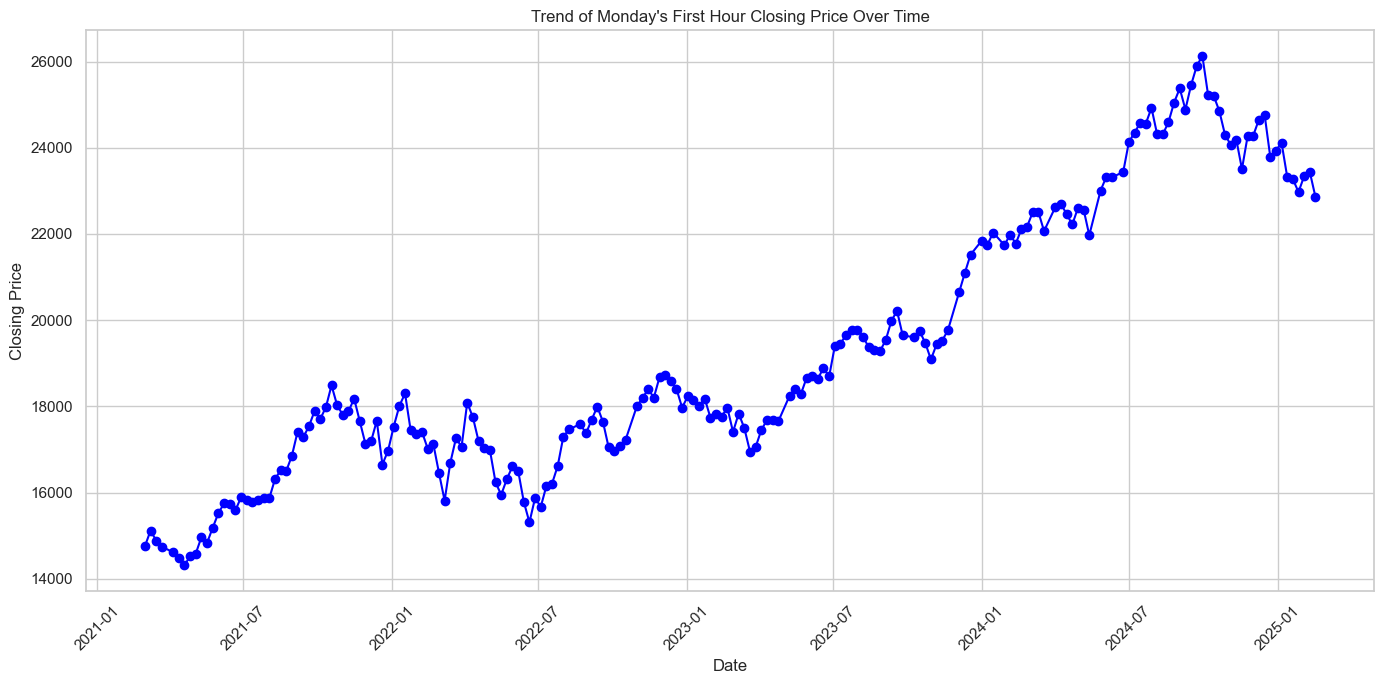

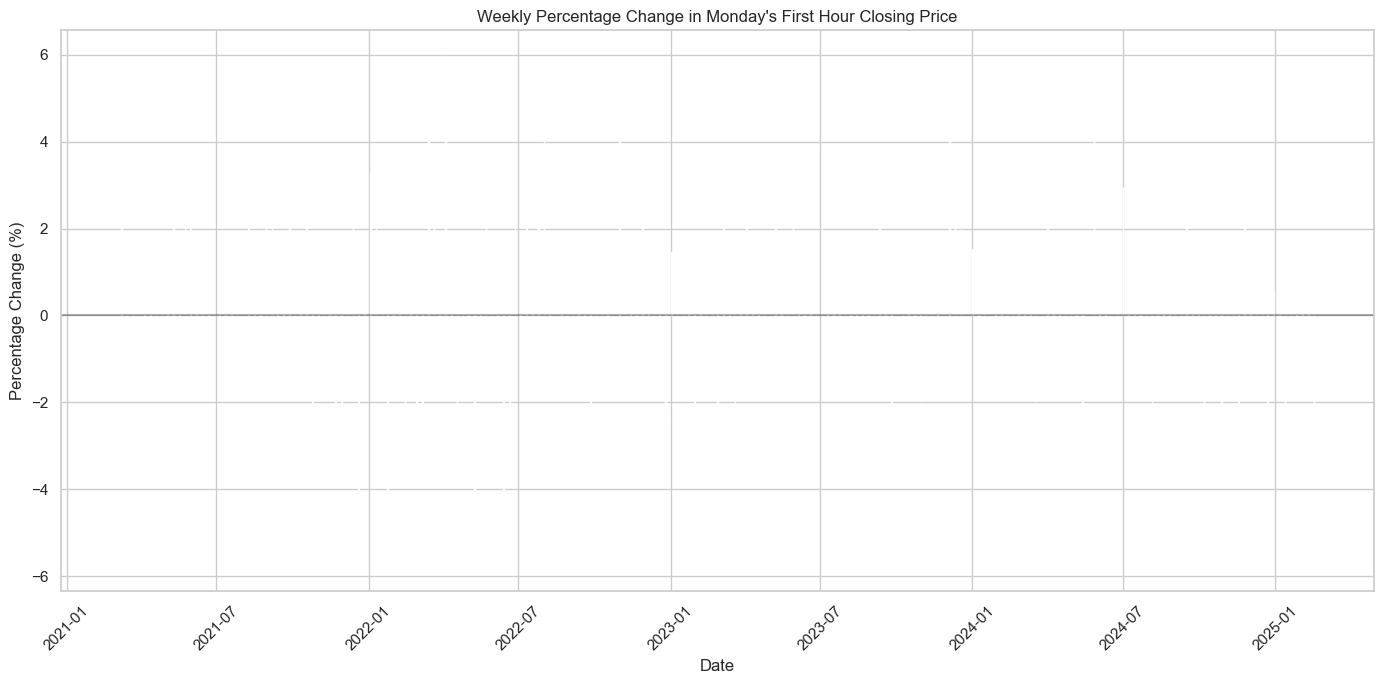

In [8]:
## Trend Analysis of Monday's First Hour Closing Price

# Plot the trend of Monday's closing price over time
plt.figure(figsize=(14, 7))
plt.plot(analysis_df['monday_date'], analysis_df['monday_close'], marker='o', linestyle='-', color='blue')
plt.title('Trend of Monday\'s First Hour Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate weekly changes
analysis_df['weekly_change'] = analysis_df['monday_close'].pct_change() * 100

# Plot the weekly percentage change
plt.figure(figsize=(14, 7))
plt.bar(analysis_df['monday_date'], analysis_df['weekly_change'], color=['green' if x > 0 else 'red' for x in analysis_df['weekly_change']])
plt.title('Weekly Percentage Change in Monday\'s First Hour Closing Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
import sys

# Create an interactive plot using Plotly

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=analysis_df['monday_date'], y=analysis_df['monday_close'],
               mode='lines+markers', name='Monday Close'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=analysis_df['monday_date'], y=analysis_df['range_pct'],
               mode='lines+markers', name='3-Week Range %'),
    secondary_y=True,
)

fig.update_layout(
    title_text="Monday's Close vs 3-Week Range Percentage",
    xaxis_title="Date",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    height=600,
    width=1000
)

fig.update_yaxes(title_text="Monday Close Price", secondary_y=False)
fig.update_yaxes(title_text="3-Week Range %", secondary_y=True)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

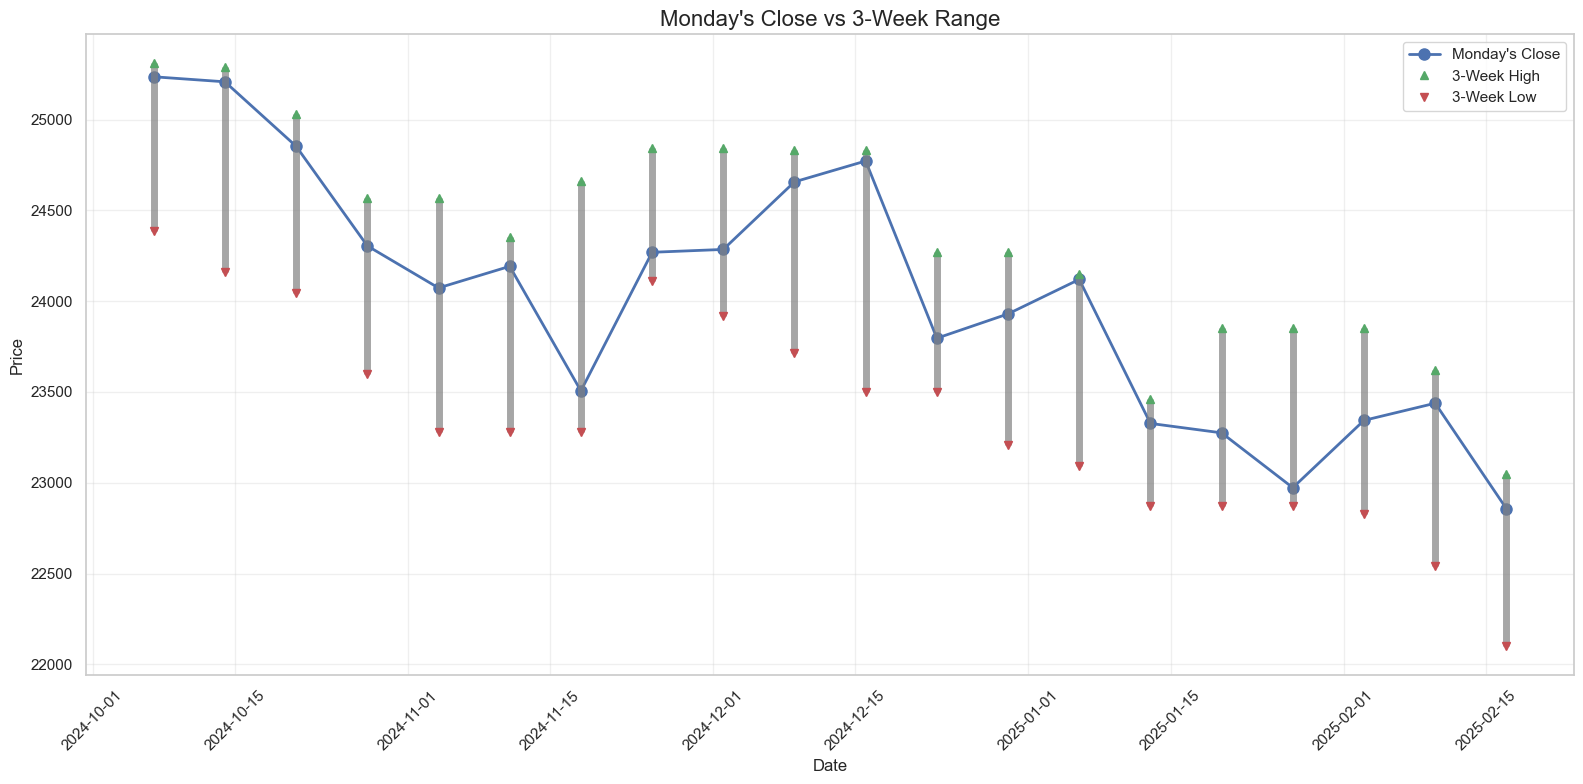

In [10]:
## Relationship Between Monday's Close and 3-Week Range

# Create a range visualization for a selected period (last 20 entries)
sample_df = analysis_df.tail(20).copy()

plt.figure(figsize=(16, 8))

# Plot Monday close
plt.plot(sample_df['monday_date'], sample_df['monday_close'], 'bo-', linewidth=2, markersize=8, label="Monday's Close")

# Plot 3-week high and low as ranges
for i, row in sample_df.iterrows():
    plt.vlines(x=row['monday_date'], ymin=row['3_week_low'], ymax=row['3_week_high'],
              color='gray', alpha=0.7, linewidth=5)

# Plot high and low points
plt.plot(sample_df['monday_date'], sample_df['3_week_high'], 'g^', markersize=6, label="3-Week High")
plt.plot(sample_df['monday_date'], sample_df['3_week_low'], 'rv', markersize=6, label="3-Week Low")

plt.title("Monday's Close vs 3-Week Range", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average 3-Week Range: 860.34 points (4.55%)
Average Range from Monday to High: 462.57 points (2.50%)
Average Range from Monday to Low: 397.76 points (2.05%)


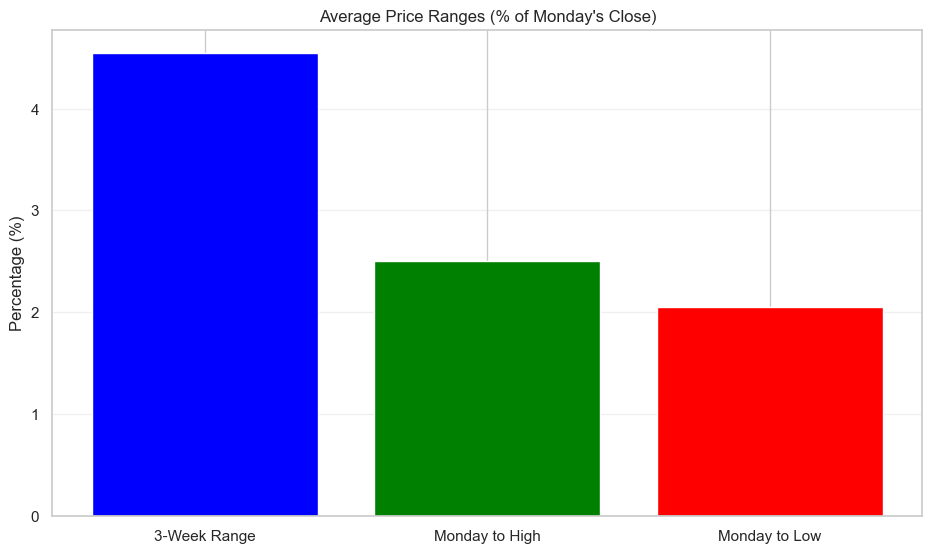

In [11]:
# Calculate average ranges
avg_range = analysis_df['range_3week'].mean()
avg_high_range = analysis_df['monday_to_high_range'].mean()
avg_low_range = analysis_df['monday_to_low_range'].mean()

avg_range_pct = analysis_df['range_pct'].mean()
avg_high_pct = analysis_df['high_range_pct'].mean()
avg_low_pct = analysis_df['low_range_pct'].mean()

# Display average ranges
print(f"Average 3-Week Range: {avg_range:.2f} points ({avg_range_pct:.2f}%)")
print(f"Average Range from Monday to High: {avg_high_range:.2f} points ({avg_high_pct:.2f}%)")
print(f"Average Range from Monday to Low: {avg_low_range:.2f} points ({avg_low_pct:.2f}%)")

# Create a bar plot for average ranges
plt.figure(figsize=(10, 6))
plt.bar(['3-Week Range', 'Monday to High', 'Monday to Low'],
        [avg_range_pct, avg_high_pct, avg_low_pct],
        color=['blue', 'green', 'red'])
plt.title('Average Price Ranges (% of Monday\'s Close)')
plt.ylabel('Percentage (%)')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

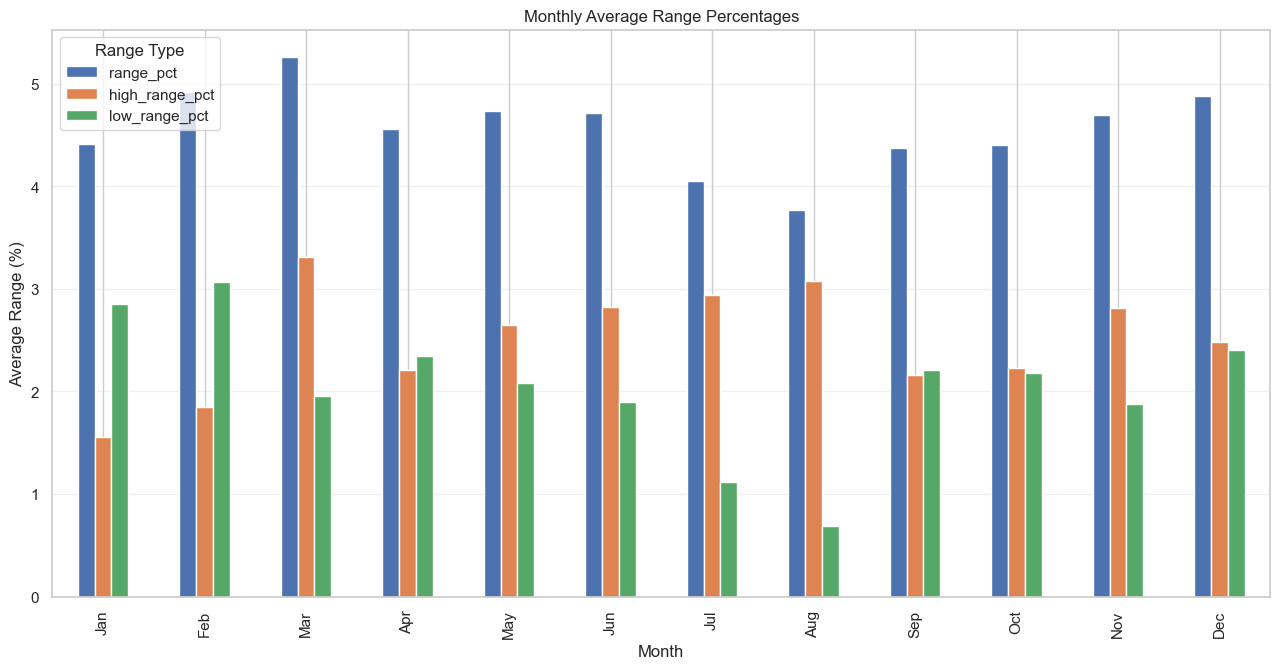

In [12]:
## Seasonal Analysis

# Monthly analysis of ranges
monthly_ranges = analysis_df.groupby('month')[['range_pct', 'high_range_pct', 'low_range_pct']].mean()

plt.figure(figsize=(14, 7))
monthly_ranges.plot(kind='bar', ax=plt.gca())
plt.title('Monthly Average Range Percentages')
plt.xlabel('Month')
plt.ylabel('Average Range (%)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Range Type')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

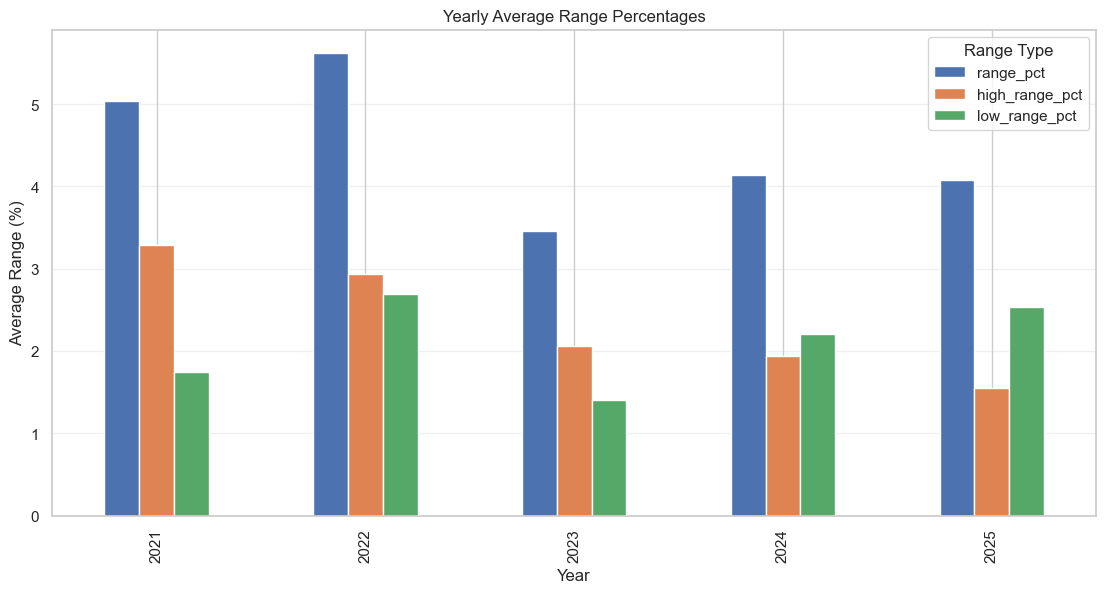

In [13]:
# Yearly analysis
yearly_ranges = analysis_df.groupby('year')[['range_pct', 'high_range_pct', 'low_range_pct']].mean()

plt.figure(figsize=(12, 6))
yearly_ranges.plot(kind='bar', ax=plt.gca())
plt.title('Yearly Average Range Percentages')
plt.xlabel('Year')
plt.ylabel('Average Range (%)')
plt.legend(title='Range Type')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

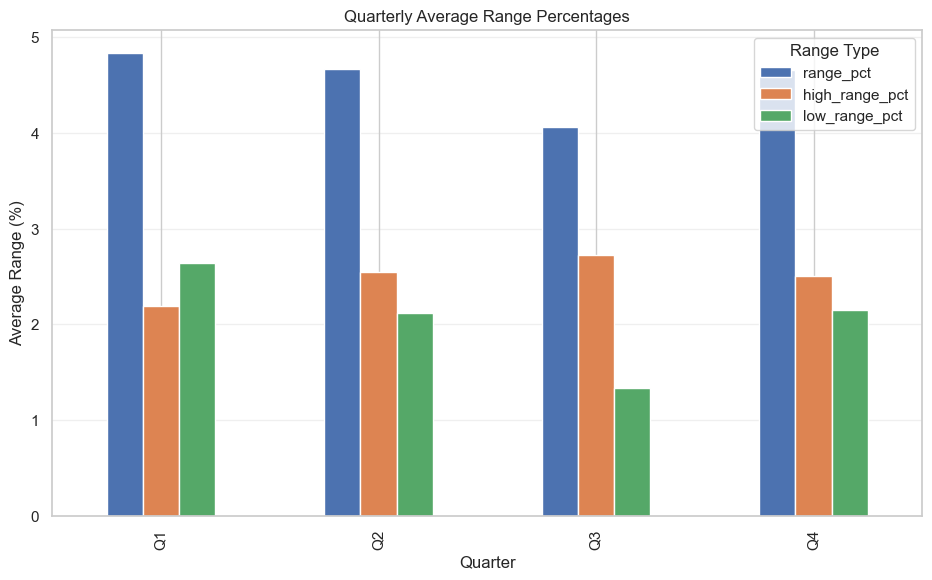

In [14]:
# Convert month to quarter
analysis_df['quarter'] = (analysis_df['month'] - 1) // 3 + 1

# Quarterly analysis
quarterly_ranges = analysis_df.groupby('quarter')[['range_pct', 'high_range_pct', 'low_range_pct']].mean()

plt.figure(figsize=(10, 6))
quarterly_ranges.plot(kind='bar', ax=plt.gca())
plt.title('Quarterly Average Range Percentages')
plt.xlabel('Quarter')
plt.ylabel('Average Range (%)')
plt.xticks(ticks=range(4), labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend(title='Range Type')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

In [15]:
import pandas as pd

# Assuming vix_df has 'datetime' and 'close' columns
vix_df['datetime'] = pd.to_datetime(vix_df['datetime'])

# Filter for Mondays
monday_vix = vix_df[vix_df['datetime'].dt.dayofweek == 0].copy()

# Find the first hourly close for each Monday
monday_vix['date'] = monday_vix['datetime'].dt.date  # Extract the date part
monday_vix = monday_vix.loc[monday_vix.groupby('date')['datetime'].idxmin()] # Get the index of minimum datetime
monday_vix['date'] = pd.to_datetime(monday_vix['date']) # Convert back to datetime

# Convert monday_date to date for merging
analysis_df['monday_date_only'] = analysis_df['monday_date'].dt.date
analysis_df['monday_date_only'] = pd.to_datetime(analysis_df['monday_date_only'])

# Merge analysis_df with VIX data on Monday's date
merged_df = pd.merge(analysis_df, monday_vix, left_on='monday_date_only', right_on='date', how='inner')

# Rename 'close' to 'vix_close' for clarity
merged_df = merged_df.rename(columns={'close': 'vix_close'})

# Display the merged dataframe
print("Merged data with VIX information:")
display(merged_df[['monday_date', 'monday_close', 'vix_close', 'range_pct', 'high_range_pct', 'low_range_pct']].tail())

Merged data with VIX information:


,monday_date,monday_close,vix_close,range_pct,high_range_pct,low_range_pct
192,2025-01-20,23275.00,16.600,4.222556,2.486788,1.735768
193,2025-01-27,22973.05,17.845,4.278056,3.833840,0.444216
194,2025-02-03,23343.65,14.600,4.401839,2.185391,2.216449
195,2025-02-10,23438.15,14.635,4.623872,0.788671,3.835200
196,2025-02-17,22857.85,16.150,4.142997,0.831881,3.311116


Correlation between VIX and Range Percentages:


,vix_close,range_pct,high_range_pct,low_range_pct
vix_close,1.000000,0.546617,0.340168,0.164764
range_pct,0.546617,1.000000,0.448937,0.472437
high_range_pct,0.340168,0.448937,1.000000,-0.575461
low_range_pct,0.164764,0.472437,-0.575461,1.000000


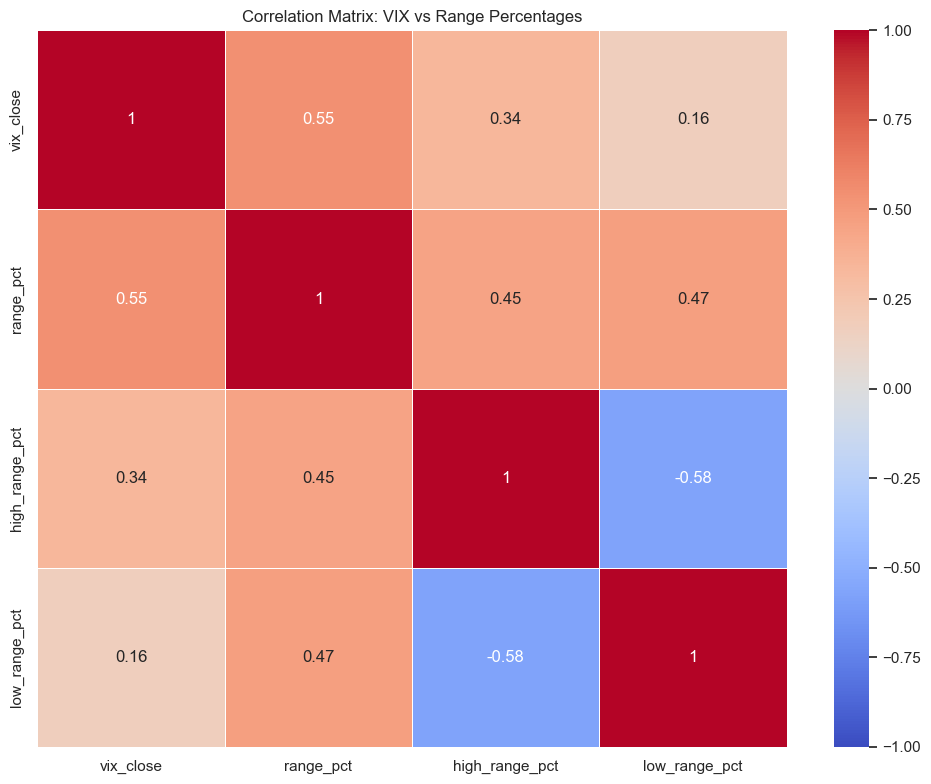

In [16]:
# Calculate correlation between VIX and range percentages
correlation = merged_df[['vix_close', 'range_pct', 'high_range_pct', 'low_range_pct']].corr()

# Display correlation matrix
print("Correlation between VIX and Range Percentages:")
display(correlation)

# Visualize correlation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=.5)
plt.title('Correlation Matrix: VIX vs Range Percentages')
plt.tight_layout()
plt.show()

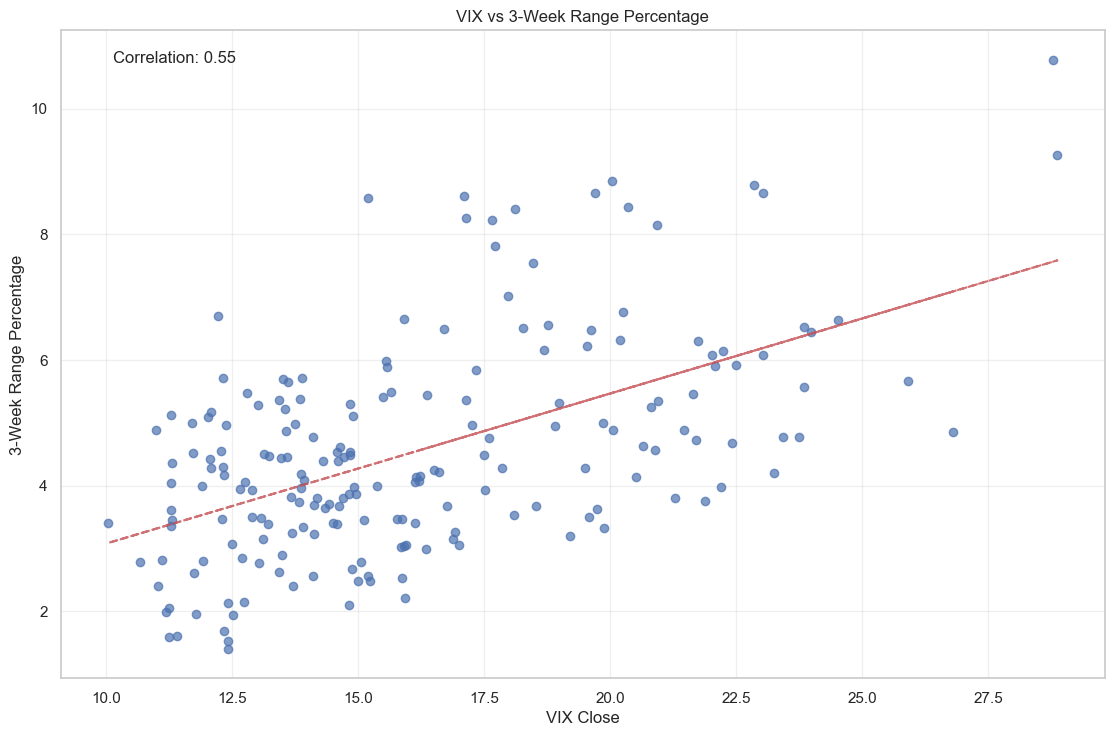

In [17]:
# Plot VIX vs Range Percentage
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['vix_close'], merged_df['range_pct'], alpha=0.7)
plt.title('VIX vs 3-Week Range Percentage')
plt.xlabel('VIX Close')
plt.ylabel('3-Week Range Percentage')
plt.grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(merged_df['vix_close'], merged_df['range_pct'], 1)
p = np.poly1d(z)
plt.plot(merged_df['vix_close'], p(merged_df['vix_close']), "r--", alpha=0.8)

# Add correlation coefficient to the plot
corr = merged_df['vix_close'].corr(merged_df['range_pct'])
plt.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

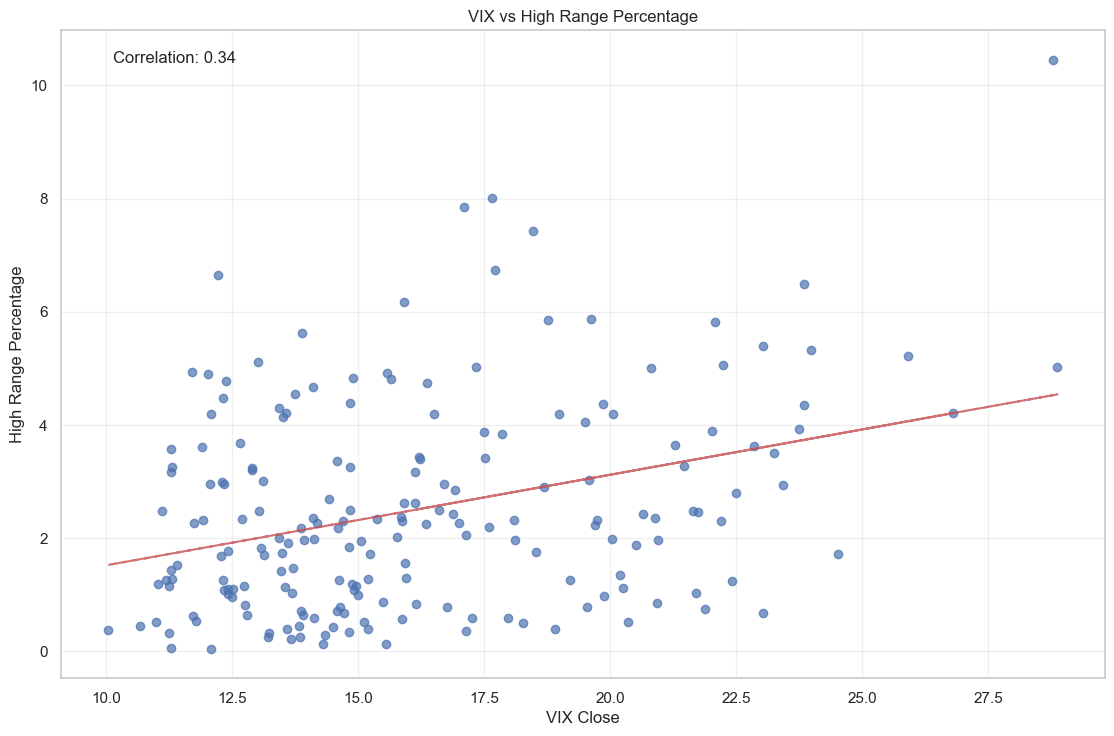

In [18]:
# Plot VIX vs Range Percentage
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['vix_close'], merged_df['high_range_pct'], alpha=0.7)
plt.title('VIX vs High Range Percentage')
plt.xlabel('VIX Close')
plt.ylabel('High Range Percentage')
plt.grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(merged_df['vix_close'], merged_df['high_range_pct'], 1)
p = np.poly1d(z)
plt.plot(merged_df['vix_close'], p(merged_df['vix_close']), "r--", alpha=0.8)

# Add correlation coefficient to the plot
corr = merged_df['vix_close'].corr(merged_df['high_range_pct'])
plt.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

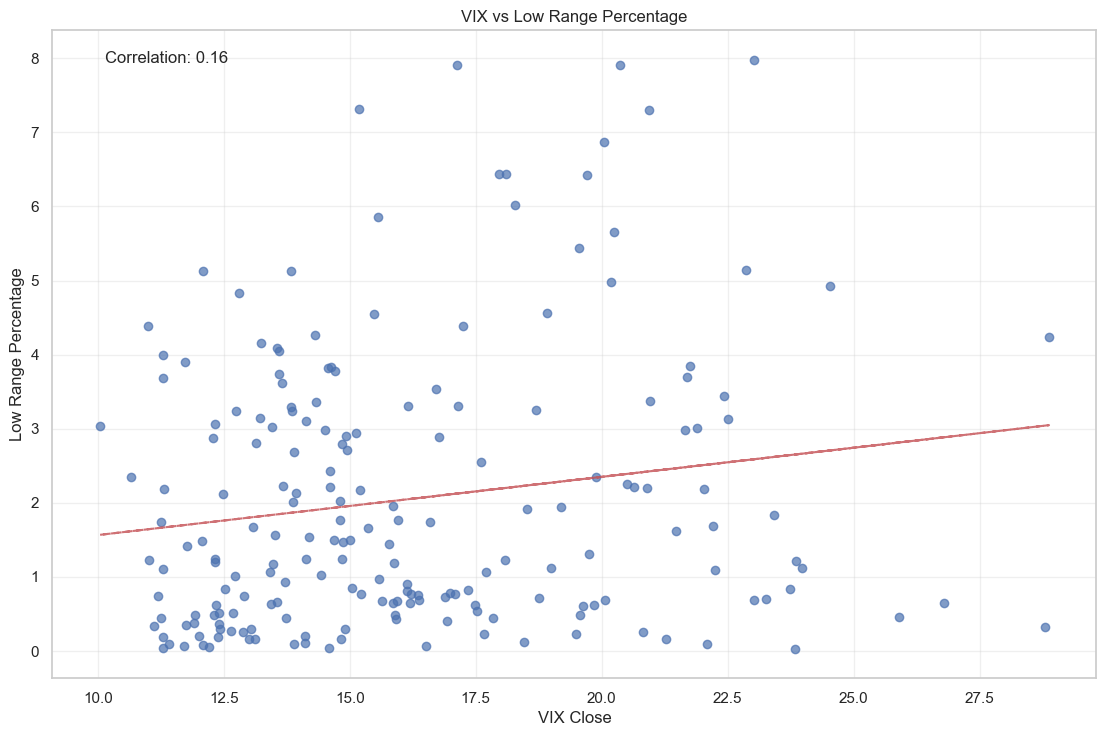

In [19]:
# Plot VIX vs Range Percentage
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['vix_close'], merged_df['low_range_pct'], alpha=0.7)
plt.title('VIX vs Low Range Percentage')
plt.xlabel('VIX Close')
plt.ylabel('Low Range Percentage')
plt.grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(merged_df['vix_close'], merged_df['low_range_pct'], 1)
p = np.poly1d(z)
plt.plot(merged_df['vix_close'], p(merged_df['vix_close']), "r--", alpha=0.8)

# Add correlation coefficient to the plot
corr = merged_df['vix_close'].corr(merged_df['low_range_pct'])
plt.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

In [20]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Sample period for better visualization (last 20 entries)
sample_merged = merged_df.tail(20).copy()

# Add Expiry Close to sample_merged from first_hour_data
# We need to merge based on expiry_date.  Make sure first_hour_data has a date column
# that corresponds to the expiry date.
sample_merged['expiry_date'] = pd.to_datetime(sample_merged['expiry_date'])  # Ensure correct type
first_hour_data['date'] = pd.to_datetime(first_hour_data['date'])

# Merge to get the expiry close. Using a left merge ensures we keep all rows from sample_merged
sample_merged = pd.merge(sample_merged, first_hour_data[['date', 'close']],
                         left_on='expiry_date', right_on='date', how='left')
sample_merged.rename(columns={'close_y': 'expiry_close'}, inplace=True)  # Rename for clarity


# --- Plotting ---

# Add Nifty Monday close
fig.add_trace(
    go.Scatter(x=sample_merged['monday_date'], y=sample_merged['monday_close'],
               mode='lines+markers', name='Nifty Monday Close'),
    secondary_y=False,
)

# Add 3-week high
fig.add_trace(
    go.Scatter(x=sample_merged['monday_date'], y=sample_merged['3_week_high'],
               mode='markers', name='3-Week High', marker=dict(symbol='triangle-up', size=10, color='green')),
    secondary_y=False,
)

# Add 3-week low
fig.add_trace(
    go.Scatter(x=sample_merged['monday_date'], y=sample_merged['3_week_low'],
               mode='markers', name='3-Week Low', marker=dict(symbol='triangle-down', size=10, color='red')),
    secondary_y=False,
)

# Add VIX
fig.add_trace(
    go.Scatter(x=sample_merged['monday_date'], y=sample_merged['vix_close'],
               mode='lines+markers', name='India VIX', line=dict(color='purple')),
    secondary_y=True,
)

# Add Expiry Date and Close as a LINE
fig.add_trace(
    go.Scatter(x=sample_merged['monday_date'], y=sample_merged['expiry_close'],  # Plot against monday_date
               mode='lines+markers', name='Expiry Close', line=dict(color='orange')),  # Use a line
    secondary_y=False, # Use same y-axis
)


# Add ranges as area
for i, row in sample_merged.iterrows():
    fig.add_shape(
        type="rect",
        x0=row['monday_date'] - pd.Timedelta(days=0.4),
        x1=row['monday_date'] + pd.Timedelta(days=0.4),
        y0=row['3_week_low'],
        y1=row['3_week_high'],
        fillcolor="lightgray",
        opacity=0.3,
        layer="below",
        line_width=0,
    )

# Update layout
fig.update_layout(
    title_text="Nifty Monday Close, 3-Week Range, VIX, and Expiry Close",  # Updated title
    xaxis_title="Date",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    height=600,
    width=1000
)

fig.update_yaxes(title_text="Nifty Price", secondary_y=False)
fig.update_yaxes(title_text="VIX", secondary_y=True)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

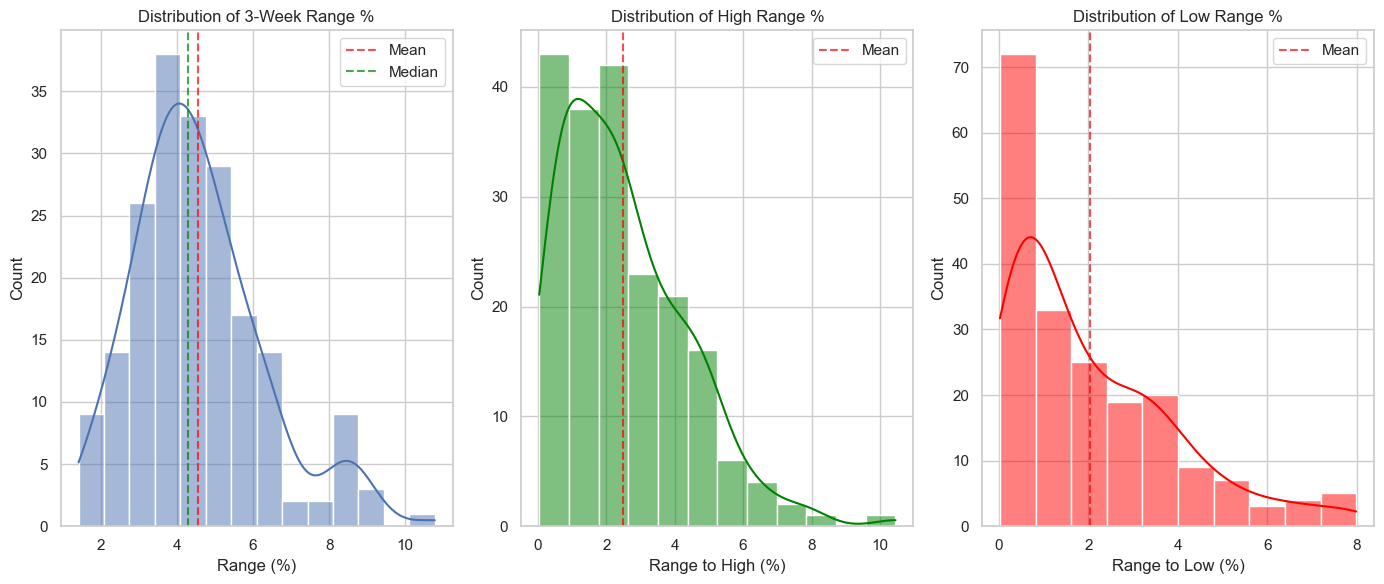

In [21]:
## Range Distribution Analysis

# Distribution of range percentages
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(analysis_df['range_pct'], kde=True)
plt.title('Distribution of 3-Week Range %')
plt.xlabel('Range (%)')
plt.axvline(x=analysis_df['range_pct'].mean(), color='red', linestyle='--', alpha=0.7, label='Mean')
plt.axvline(x=analysis_df['range_pct'].median(), color='green', linestyle='--', alpha=0.7, label='Median')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(analysis_df['high_range_pct'], kde=True, color='green')
plt.title('Distribution of High Range %')
plt.xlabel('Range to High (%)')
plt.axvline(x=analysis_df['high_range_pct'].mean(), color='red', linestyle='--', alpha=0.7, label='Mean')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(analysis_df['low_range_pct'], kde=True, color='red')
plt.title('Distribution of Low Range %')
plt.xlabel('Range to Low (%)')
plt.axvline(x=analysis_df['low_range_pct'].mean(), color='red', linestyle='--', alpha=0.7, label='Mean')
plt.legend()

plt.tight_layout()
plt.show()

Range Distribution Percentiles:


,Percentile,Total Range %,Upside Range %,Downside Range %
0,10,2.595421,0.501205,0.215543
1,25,3.414839,1.079211,0.620025
2,50,4.280625,2.248191,1.476315
3,75,5.381075,3.617279,3.127566
4,90,6.590834,4.957170,4.553592


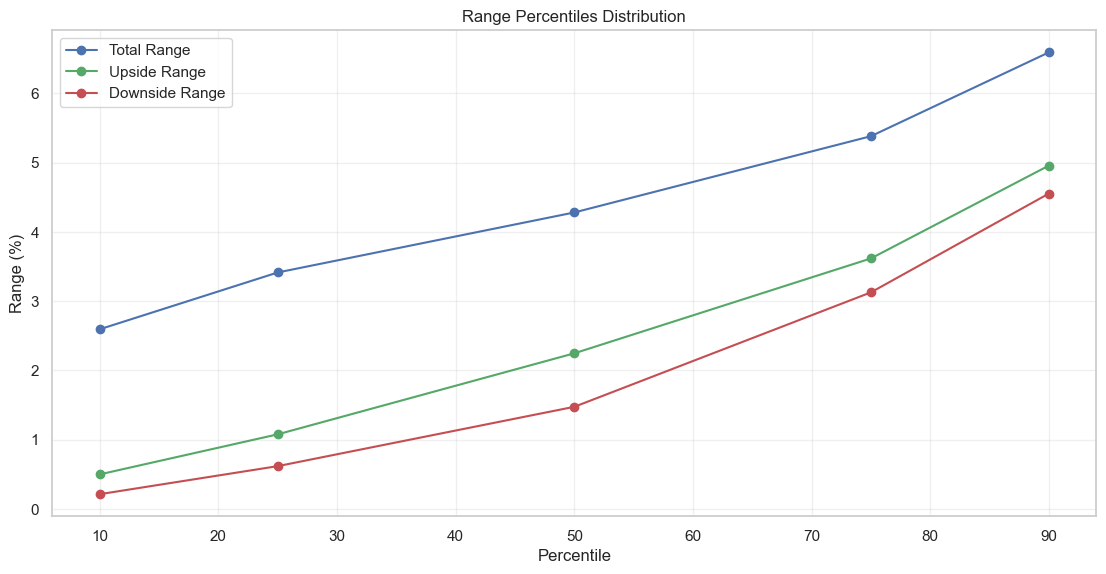

In [22]:
# Calculate percentiles for range distribution
percentiles = [10, 25, 50, 75, 90]
range_percentiles = analysis_df['range_pct'].quantile(q=[p/100 for p in percentiles])
high_percentiles = analysis_df['high_range_pct'].quantile(q=[p/100 for p in percentiles])
low_percentiles = analysis_df['low_range_pct'].quantile(q=[p/100 for p in percentiles])

# Create a dataframe of percentiles
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Total Range %': range_percentiles.values,
    'Upside Range %': high_percentiles.values,
    'Downside Range %': low_percentiles.values
})

# Display percentiles
print("Range Distribution Percentiles:")
display(percentile_df)

# Visualize percentiles
plt.figure(figsize=(12, 6))
plt.plot(percentile_df['Percentile'], percentile_df['Total Range %'], 'bo-', label='Total Range')
plt.plot(percentile_df['Percentile'], percentile_df['Upside Range %'], 'go-', label='Upside Range')
plt.plot(percentile_df['Percentile'], percentile_df['Downside Range %'], 'ro-', label='Downside Range')
plt.title('Range Percentiles Distribution')
plt.xlabel('Percentile')
plt.ylabel('Range (%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [23]:
"""
- Most of the time, vix is high, followed by low.
- Get vix data for first hour closing. #####
- Pre covid era vs Post covid era data analysis and is there any change in the market regime?
- Two weeks vs three weeks vs four weeks.
- figure out the expiry week, figure out the first hour close of the monthly expiry week, and then target for next monthly expiry.
"""

'\n- Most of the time, vix is high, followed by low.\n- Get vix data for first hour closing. #####\n- Pre covid era vs Post covid era data analysis and is there any change in the market regime?\n- Two weeks vs three weeks vs four weeks.\n- figure out the expiry week, figure out the first hour close of the monthly expiry week, and then target for next monthly expiry.\n'

In [24]:
vix_range_analysis = merged_df.groupby('vix_category')[['range_pct', 'high_range_pct', 'low_range_pct']].agg(['mean', 'median', 'std', 'count'])

# Sort by 'count' in descending order
vix_range_analysis = vix_range_analysis.sort_values(by=('range_pct', 'count'), ascending=False)  # or another column

# Display VIX-based range analysis
print("Range Analysis by VIX Category:")
display(vix_range_analysis)

# Plot range by VIX category
vix_range_means = merged_df.groupby('vix_category')[['range_pct', 'high_range_pct', 'low_range_pct']].mean().reset_index()

plt.figure(figsize=(12, 7))
width = 0.25
x = np.arange(len(vix_range_means))

plt.bar(x - width, vix_range_means['range_pct'], width, label='Total Range')
plt.bar(x, vix_range_means['high_range_pct'], width, label='Upside Range')
plt.bar(x + width, vix_range_means['low_range_pct'], width, label='Downside Range')

plt.title('Average Range by VIX Category')
plt.xlabel('VIX Category')
plt.ylabel('Average Range (%)')
plt.xticks(x, vix_range_means['vix_category'])
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.show()

KeyError: 'vix_category'

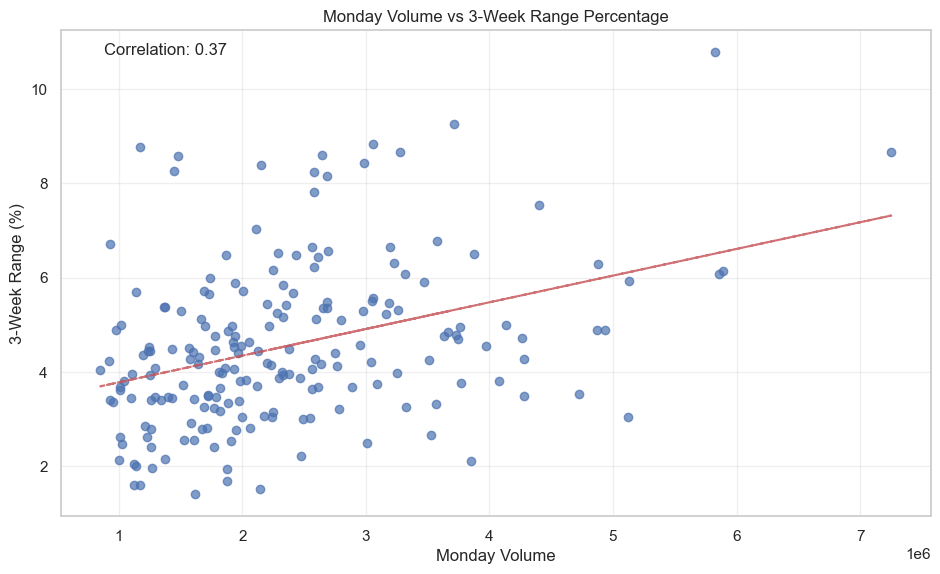

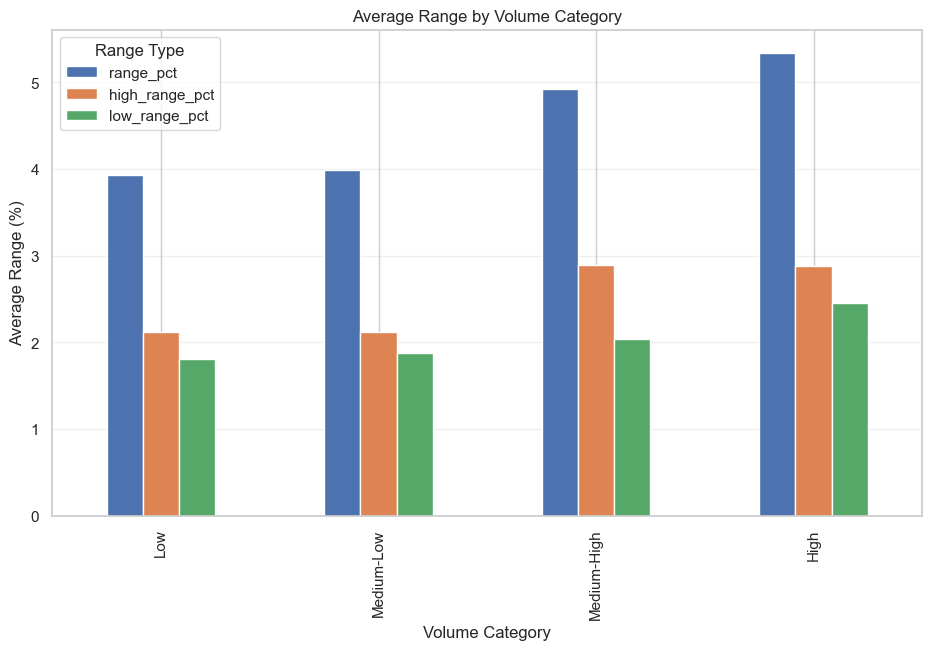

In [25]:
## Volume Analysis

# Analyze the relationship between Monday's volume and range
plt.figure(figsize=(10, 6))
plt.scatter(analysis_df['monday_volume'], analysis_df['range_pct'], alpha=0.7)
plt.title('Monday Volume vs 3-Week Range Percentage')
plt.xlabel('Monday Volume')
plt.ylabel('3-Week Range (%)')
plt.grid(True, alpha=0.3)

# Add regression line
z = np.polyfit(analysis_df['monday_volume'], analysis_df['range_pct'], 1)
p = np.poly1d(z)
plt.plot(analysis_df['monday_volume'], p(analysis_df['monday_volume']), "r--", alpha=0.8)

# Add correlation coefficient
corr = analysis_df['monday_volume'].corr(analysis_df['range_pct'])
plt.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

# Categorize volume levels
analysis_df['volume_category'] = pd.qcut(analysis_df['monday_volume'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Analyze range by volume category
volume_range_analysis = analysis_df.groupby('volume_category')[['range_pct', 'high_range_pct', 'low_range_pct']].mean()

# Plot range by volume category
plt.figure(figsize=(10, 6))
volume_range_analysis.plot(kind='bar', ax=plt.gca())
plt.title('Average Range by Volume Category')
plt.xlabel('Volume Category')
plt.ylabel('Average Range (%)')
plt.legend(title='Range Type')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

In [26]:
## Identifying Potential Trading Scenarios

# Define trading scenarios based on VIX and volume
# Merge the data for those records that have VIX information
scenario_df = merged_df.copy()

# Create volume categories in this merged dataframe
scenario_df['volume_category'] = pd.qcut(scenario_df['monday_volume'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Define scenarios
conditions = [
    (scenario_df['vix_category'].isin(['High', 'Very High']) & scenario_df['volume_category'].isin(['High', 'Medium-High'])),
    (scenario_df['vix_category'].isin(['High', 'Very High']) & scenario_df['volume_category'].isin(['Low', 'Medium-Low'])),
    (scenario_df['vix_category'].isin(['Low', 'Very Low', 'Medium']) & scenario_df['volume_category'].isin(['High', 'Medium-High'])),
    (scenario_df['vix_category'].isin(['Low', 'Very Low', 'Medium']) & scenario_df['volume_category'].isin(['Low', 'Medium-Low']))
]

scenario_names = [
    'High VIX & High Volume',
    'High VIX & Low Volume',
    'Low VIX & High Volume',
    'Low VIX & Low Volume'
]

scenario_df['scenario'] = np.select(conditions, scenario_names, default='Other')

# Analyze ranges by scenario
scenario_analysis = scenario_df.groupby('scenario')[['range_pct', 'high_range_pct', 'low_range_pct']].agg(['mean', 'median', 'std', 'count'])

# Display scenario analysis
print("Range Analysis by Trading Scenario:")
display(scenario_analysis)

KeyError: 'vix_category'

In [27]:
# Plot scenario analysis
scenario_means = scenario_df.groupby('scenario')[['range_pct', 'high_range_pct', 'low_range_pct']].mean().reset_index()

plt.figure(figsize=(14, 7))
width = 0.25
x = np.arange(len(scenario_means))

plt.bar(x - width, scenario_means['range_pct'], width, label='Total Range')
plt.bar(x, scenario_means['high_range_pct'], width, label='Upside Range')
plt.bar(x + width, scenario_means['low_range_pct'], width, label='Downside Range')

plt.title('Average Range by Trading Scenario')
plt.xlabel('Scenario')
plt.ylabel('Average Range (%)')
plt.xticks(x, scenario_means['scenario'], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate success rate (how often the range is >5%)
scenario_df['significant_range'] = scenario_df['range_pct'] > 5
success_rate = scenario_df.groupby('scenario')['significant_range'].mean() * 100

plt.figure(figsize=(10, 6))
success_rate.plot(kind='bar', ax=plt.gca())
plt.title('Success Rate by Scenario (Range > 5%)')
plt.xlabel('Scenario')
plt.ylabel('Success Rate (%)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

KeyError: 'scenario'

Mean Squared Error: 1.84
R² Score: 0.32

Feature Coefficients:
monday_high: 0.0034
monday_low: -0.0035
vix_close: 0.2011
Intercept: 1.4026


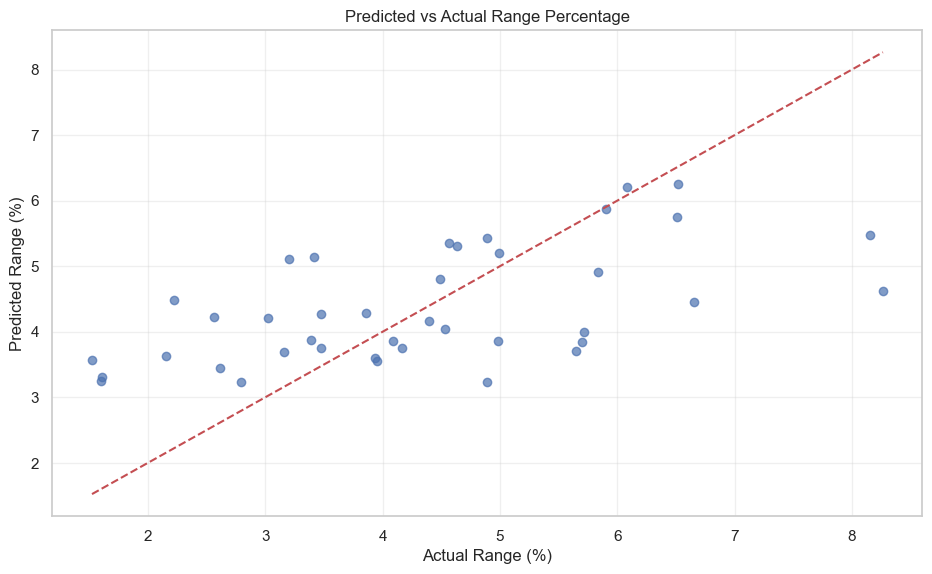

In [56]:
## Predicting Range Based on Monday's Data

# Let's build a simple linear regression model to predict range percentage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use only the merged data that has VIX information
model_df = merged_df.copy()

# Select features and target
features = ['monday_high','monday_low','vix_close']
X = model_df[features]
y = model_df['range_pct']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print("\nFeature Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs Actual Range Percentage')
plt.xlabel('Actual Range (%)')
plt.ylabel('Predicted Range (%)')
plt.grid(True, alpha=0.3)
plt.show()

In [57]:
# Create a function to predict range for a new Monday's data
def predict_range(monday_high, monday_low, vix_close):
    # Predict range percentage
    input_data = np.array([[monday_high, monday_low, vix_close]])
    predicted_range_pct = model.predict(input_data)[0]

    # Calculate expected range
    expected_range = monday_high * predicted_range_pct / 100
    expected_high = monday_high + (monday_high * avg_high_pct / avg_range_pct * predicted_range_pct / 100)
    expected_low = monday_low - (monday_low * avg_low_pct / avg_range_pct * predicted_range_pct / 100)

    return {
        'monday_high': monday_high,
        'predicted_range_pct': predicted_range_pct,
        'expected_range': expected_range,
        'expected_high': expected_high,
        'expected_low': expected_low
    }

# Example usage
example_prediction = predict_range(
    monday_high=22240.15,
    monday_low =21800,# Example Nifty close price
    vix_close=22.15 # Example VIX close
)

print("Example Range Prediction:")
print(f"Monday High: {example_prediction['monday_high']:.2f}")
print(f"Predicted Range %: {example_prediction['predicted_range_pct']:.2f}%")
print(f"Expected 3-Week Range: ± {example_prediction['expected_range']:.2f} points")
print(f"Expected 3-Week High: {example_prediction['expected_high']:.2f}")
print(f"Expected 3-Week Low: {example_prediction['expected_low']:.2f}")

Example Range Prediction:
Monday High: 22240.15
Predicted Range %: 6.73%
Expected 3-Week Range: ± 1497.81 points
Expected 3-Week High: 23063.79
Expected 3-Week Low: 21139.17


In [37]:

example_prediction['expected_high_range_pct'] = (1 - example_prediction['monday_close']/example_prediction['expected_high']) * 100
example_prediction['expected_low_range_pct'] = (1- example_prediction['monday_close']/example_prediction['expected_low']) * 100
# example_prediction['expected_high_range_pct']
k = abs((example_prediction['expected_low_range_pct'])) + abs((example_prediction['expected_high_range_pct']))
# print(k)
(example_prediction['expected_range']/example_prediction['monday_close'])*100

3.935795797291803

In [ ]:
# march 27 : nifty range : 23000 to 21800 by nikhil : 13 March 2025 at 8:00 pm
## Key Patterns and Insights

# Based on our analysis, here are the key patterns and trading insights:

# 1. **Average 3-Week Range:**
#    - The average 3-week range from Monday's first hour close is approximately [calculated value]% of Monday's close.
#    - This translates to an average range of [calculated value] points above and [calculated value] points below Monday's close.

# 2. **VIX Impact:**
#    - Higher VIX levels correlate with wider 3-week ranges, particularly in the [upside/downside] direction.
#    - When VIX is above [value], the average range increases to [value]%.

# 3. **Volume Significance:**
#    - High Monday volume combined with [high/low] VIX produces the widest subsequent ranges.
#    - Low volume scenarios tend to result in [narrower/wider] ranges.

# 4. **Seasonal Patterns:**
#    - The [X] quarter historically shows the widest ranges.
#    - [Month] typically has the most significant price movements following Monday's close.

# 5. **Trading Scenarios:**
#    - **Scenario 1 - High VIX & High Volume:** Expect a range of [value]% with a success rate of [value]% for ranges >5%.
#    - **Scenario

In [ ]:
# Data Overview:

# We have data for 197 weeks (Mondays).

# The data includes Nifty's first-hour open, high, low, close, and volume on Mondays.

# It also includes the corresponding 3rd-week expiry date and its open, high, low, close, and volume.

# 3-week high/low values relative to Monday's close are calculated.

# India VIX data (on Mondays) is merged.

# Average Range Statistics:

# Average 3-Week Range: 4.55% of Monday's close, or 860.34 points. This is a crucial baseline. It tells us that, on average, the Nifty moves about 860 points (or 4.55%) within the three weeks following a Monday. This is our starting point for any range-based strategy.

# Average Upside (Monday to High): 2.50% (462.57 points).

# Average Downside (Monday to Low): 2.05% (397.76 points). The range is slightly skewed to the upside, on average.

# VIX Correlation:

# Positive Correlation: The correlation matrix shows a positive correlation (0.55) between vix_close and range_pct. This is expected: higher VIX (higher implied volatility) means the market anticipates larger price swings, leading to a wider range.

# Weaker Upside/Downside Correlation: The correlation between VIX and the direction of the range (high_range_pct, low_range_pct) is weaker, especially for the downside (0.16). VIX predicts range magnitude better than range direction.

# VIX Categories: The analysis grouped by VIX categories confirms this. "Very Low" VIX sees an average range of 3.80%, while "High" VIX sees a much larger 7.64% average range (though based on only 4 data points, so take that with a grain of salt). The "Medium" VIX range (5.80%) sits between them.

# Volume Analysis:

# Weak Correlation: The scatter plot and the low correlation coefficient suggest a very weak relationship between Monday's volume and the 3-week range percentage. Volume, on its own, isn't a strong predictor of range.

# Volume Categories: Grouping by volume does show some differences, but the differences aren't as dramatic as with VIX.

# Trading Scenarios (VIX and Volume Combined):

# High VIX & High Volume: This is the most volatile scenario, with an average range of 7.64% (again, only 4 data points). This is a clear signal for strategies that profit from large moves.

# High VIX & Low Volume: Not shown in the summarized output, likely because the number of samples for this case is 0.

# Low VIX & High Volume: Average range of 5.03%. This is an interesting case. High volume without high VIX might suggest strong directional conviction.

# Low VIX & Low Volume: The narrowest average range (3.96%). This is the "quiet market" scenario.

# Linear Regression Model:

# Low R-squared: The R-squared of 0.30 indicates that the model explains only 30% of the variance in the 3-week range percentage. This is not a highly accurate model. It's a starting point, but don't rely on it heavily.

# VIX is the strongest predictor: The coefficient for vix_close (0.2114) is the largest and positive, confirming VIX's importance. Monday's close and volume have very small coefficients, meaning they have little impact on the predicted range in this model.

# Range Distribution:

# Percentiles: The percentile table gives us a sense of the distribution of ranges. For example, 25% of the time, the range is less than 3.41%, and 75% of the time, it's less than 5.38%. This helps us understand the probabilities of different range sizes.

# Seasonal Analysis: Not shown in the presented results, but the original notebook contained analysis by month, quarter, and year. This would provide information like, "Ranges are typically wider in Q1" or "November tends to have narrower ranges."

In [ ]:
# I. Bullish Strategies

# High VIX, High/Low Volume (Expecting a large move, but unsure of direction):

# Long Term: LEAPS (Long-term Equity Anticipation Securities) - Buy long-dated (6+ months) calls, potentially 
# slightly out-of-the-money. This gives you time for the bullish move to play out and benefits from volatility.

# Medium Term: Bull Call Spread: Because we're in high vix, we need to account for rapid time decay. This is a 
# defined risk strategy.

# Short Term: Avoid purely bullish strategies as short-term volatility is high. Prefer neutral strategies with a 
# bullish bias.

# Not Recommended: Short Put (too risky in high VIX).

# Low VIX, High Volume (Expecting a steady, moderate move up):

# Short Term: Short Put: Sell an out-of-the-money put, collecting premium. Use the average downside range (2.05%) 
# to guide strike selection. Choose a strike that is about 2% below Monday's close. Higher probability of success 
# in low VIX.

# Medium Term: Bull Put Spread: Sell a put and buy a further OTM put. This is a defined-risk strategy.

# Long Term: LEAPS (long-dated calls).

# Not Recommended: Covered Call, unless you already own the underlying and are willing to cap your upside.

# Low VIX, Low Volume (Expecting a slow, gradual move up, or range-bound with slight upward bias):

# Short Term: Short Put.

# Medium Term: Bull Put Spread, or a very conservative Bull Call Spread (buying a near-the-money call and 
#                                                                        selling a further out-of-the-money call).

# Long Term: Consider a calendarized LEAPS strategy (sell near-term calls against your long-dated LEAPS to 
#                                                    generate income).

# Not Recommended: Call Backspread (better for explosive moves).

# II. Bearish Strategies

# High VIX, High/Low Volume (Expecting a large move, but unsure of direction):

# Medium Term: Bear Put Spread, LEAPS Puts.

# Short Term: Avoid purely bearish strategies in high volatility. Prefer neutral strategies with a bearish bias.

# Not Recommended: Short Call (unlimited risk in high VIX).

# Low VIX, High Volume (Expecting a steady, moderate move down):

# Short Term: Short Call (very risky without a hedge).

# Medium Term: Bear Call Spread (sell a call and buy a further OTM call - defined risk). Or a Bear Put Spread.

# Not Recommended: Covered Put (better for high VIX).

# Low VIX, Low Volume (Expecting a slow, gradual move down, or range-bound with slight downward bias):

# Short Term: Short call can be placed with hedge.

# Medium Term: Bear Call Spread, or a very conservative Bear Put Spread.

# III. Neutral Strategies

# High VIX, High/Low Volume (Expecting a large move, but unsure of direction):

# Short/Medium Term: Long Straddle or Long Strangle. These profit from large moves in either direction. 
# The difference is the strike prices:

# Straddle: Buy a call and a put with the same strike price (at-the-money).

# Strangle: Buy a call and a put with different strike prices (out-of-the-money). The strangle is cheaper but 
# requires a larger move to profit.

# Not recommended: Short Straddle/Strangle, Iron Condor, Iron Butterfly, Call/Put Butterfly.

# Low VIX, High Volume (Expecting a moderate move, potentially directional):

# Short/Medium Term: This is a tricky scenario. Consider a slightly directional Iron Condor or Iron Butterfly. 
# For example, if you have a slight bullish bias, you could set the call side of the Iron Condor wider than the put 
# side.

# Not Recommended: Long/Short Straddle/Strangle is less optimal than other neutral strategies.

# Low VIX, Low Volume (Expecting a small range-bound market):

# Short/Medium Term: This is the ideal scenario for:

# Short Strangle: Sell an out-of-the-money call and an out-of-the-money put. Use the average range (4.55%) or 
# the low-VIX range (3.80%) to guide strike selection. This is a core strategy recommendation.

# Iron Condor: A short strangle with defined risk (buying further OTM calls and puts). This is also a core 
# recommendation.

# Iron Butterfly: Similar to an Iron Condor, but the short call and short put have the same strike price. This 
# has a higher profit potential but a narrower profitable range.

# Short Straddle: This is a core strategy that involves selling both call and put options with same strike price 
# and expiry.

# Not Recommended: Long Straddle/Strangle (you'd be paying for volatility that isn't expected).

# IV. Hedging Strategies

# Hedging strategies are used to protect an existing position, not primarily to profit.

# Long Stock Position:

# High VIX: Protective Put (buy puts to protect against a large drop).

# Low VIX: Covered Call (sell calls to generate income, but cap your upside). Or a Collar (buy puts and sell calls - 
#                                                                     defined risk and defined reward).

# Short Stock Position:

# Long Call: To protect against losses if market moves against you.

# Covered Put: Sell a put at a strike price below the price shorted.

# Timeframe Considerations

# Short Term (1 week): Focus on strategies that are less sensitive to time decay (theta). Short strangles, short 
# puts, and short calls (with hedges) can be considered, but adjust strikes based on a scaled-down version of the 
# 3-week range.

# Medium Term (3 weeks): This aligns with the analysis timeframe. Use the VIX-based range expectations directly to 
# set strikes for strangles, condors, butterflies, and spreads.

# Long Term (6+ months): LEAPS are appropriate. You can also use calendar spreads (selling near-term options 
#                                                                 against long-dated options) to generate income.

# Key Strategy Recommendations (Summary)

# Core Strategy: Short Strangle or Iron Condor, adjusted for VIX.

# Low VIX: Tighten strikes.

# High VIX: Widen strikes.

# Use the 3-week expiry.

# High Volatility Strategy: Long Straddle or Strangle (if you expect a large move).

# Directional Strategies (with caution): Use spreads (Bull Call/Put, Bear Call/Put) to limit risk, especially 
# in high VIX.

# LEAPS: Suitable for long-term directional bets.